In [ ]:
# prepare a prediction model for profit of 50_startups data

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf

In [7]:
df=pd.read_csv("F:\\excelR\\assignments\\multi linear regression\\50_Startups.csv")
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [8]:
df=df.rename({'R&D Spend':'RD_spend'},axis=1)
df=df.rename({'Marketing Spend':'marketing_spend'},axis=1)

In [9]:
df

,RD_spend,Administration,marketing_spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RD_spend         50 non-null     float64
 1   Administration   50 non-null     float64
 2   marketing_spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [11]:
df.corr()

,RD_spend,Administration,marketing_spend,Profit
RD_spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
marketing_spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


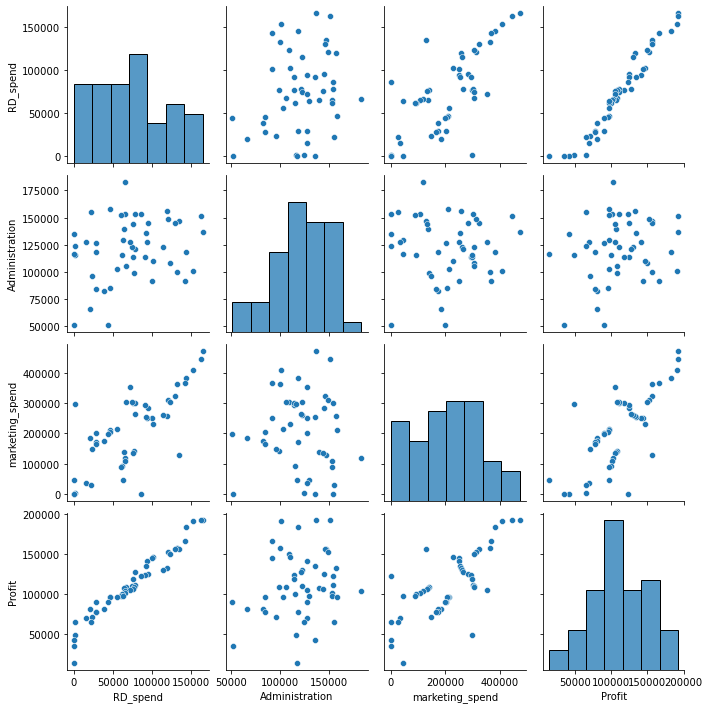

In [12]:
sns.pairplot(df)

In [13]:
#import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf

In [14]:
model=smf.ols('Profit~RD_spend+Administration+marketing_spend', data= df).fit()

In [15]:
model

In [16]:
model.params

Intercept          50122.192990
RD_spend               0.805715
Administration        -0.026816
marketing_spend        0.027228
dtype: float64

In [17]:
model.pvalues

Intercept          1.057379e-09
RD_spend           2.634968e-22
Administration     6.017551e-01
marketing_spend    1.047168e-01
dtype: float64

In [18]:
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [19]:
ml_a=smf.ols('Profit~Administration', data=df).fit()
9print(ml_a.pvalues)

Intercept         0.003824
Administration    0.162217
dtype: float64


In [20]:
ml_m=smf.ols('Profit~marketing_spend',data=df).fit()
print(ml_m.pvalues)

Intercept          4.294735e-10
marketing_spend    4.381073e-10
dtype: float64


In [21]:
ml_am=smf.ols('Profit~Administration+marketing_spend', data=df).fit()
print(ml_am.pvalues)

Intercept          2.589341e-01
Administration     1.729198e-02
marketing_spend    9.727245e-11
dtype: float64


In [29]:
rsq_rd=smf.ols('RD_spend~Administration+marketing_spend',data=df).fit().rsquared 
vif_rd=1/(1-rsq_rd)
rsq_a=smf.ols('Administration~RD_spend+marketing_spend', data=df).fit().rsquared
vif_a=1/(1-rsq_a)
rsq_m=smf.ols('marketing_spend~Administration+RD_spend',data=df).fit().rsquared
vif_m=1/(1-rsq_m)
d1={'variables':['RD_spend','Administration','marketing_spend'], 'VIF':[vif_rd,rsq_a,vif_m]}
d1_frame=pd.DataFrame(d1)
d1_frame

,variables,VIF
0,RD_spend,2.468903
1,Administration,0.149002
2,marketing_spend,2.326773


In [24]:
vif_rd

2.4689030699947017

# cook distance

In [38]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

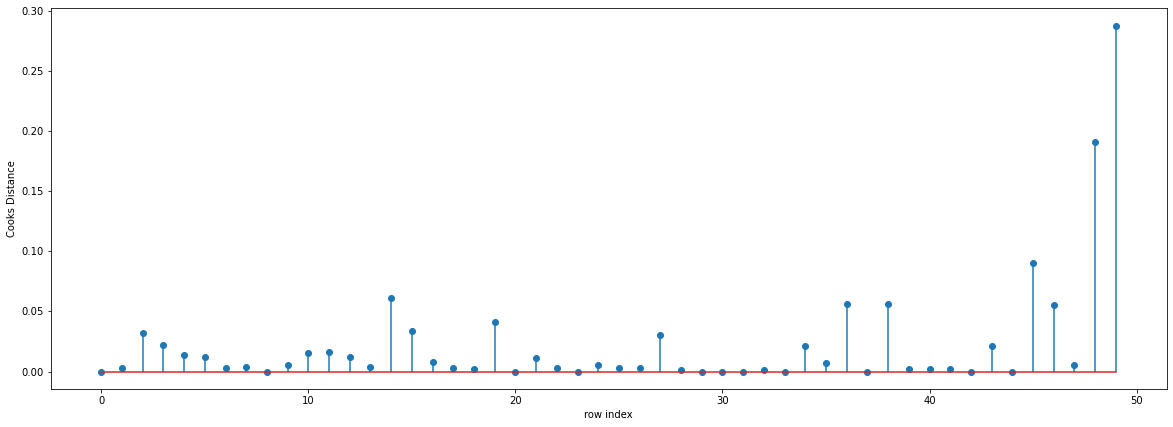

In [40]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df)), np.round(c,3))
plt.xlabel('row index')
plt.ylabel('Cooks Distance')
plt.show()

In [41]:
(np.argmax(c),np.max(c))

(49, 0.28808229275432634)

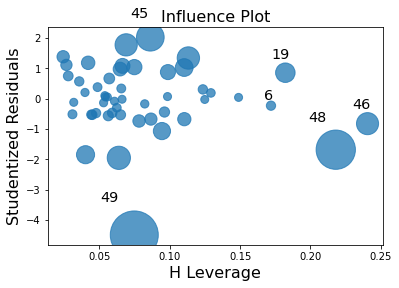

In [42]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [43]:
df[df.index.isin([48,49])]

,RD_spend,Administration,marketing_spend,State,Profit
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [44]:
df.head()

,RD_spend,Administration,marketing_spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# improving the model

In [46]:
df_new=pd.read_csv("F:\\excelR\\assignments\\multi linear regression\\50_Startups.csv")

In [47]:
df_new

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [48]:
df1=df_new.drop(df_new.index[[48,49]],axis=0).reset_index()

In [49]:
df1

,index,R&D Spend,Administration,Marketing Spend,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94
5,5,131876.90,99814.71,362861.36,New York,156991.12
6,6,134615.46,147198.87,127716.82,California,156122.51
7,7,130298.13,145530.06,323876.68,Florida,155752.60
8,8,120542.52,148718.95,311613.29,New York,152211.77
9,9,123334.88,108679.17,304981.62,California,149759.96


In [56]:
df1=df1.rename({'R&D Spend':'RD_spend'}, axis=1)
df1=df1.rename({'Marketing Spend':'marketing_spend'},axis=1)
df1

,index,RD_spend,Administration,marketing_spend,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94
5,5,131876.90,99814.71,362861.36,New York,156991.12
6,6,134615.46,147198.87,127716.82,California,156122.51
7,7,130298.13,145530.06,323876.68,Florida,155752.60
8,8,120542.52,148718.95,311613.29,New York,152211.77
9,9,123334.88,108679.17,304981.62,California,149759.96


In [57]:
final_ml_a=smf.ols('Profit~RD_spend+marketing_spend', data=df1).fit()

In [58]:
(final_ml_a.rsquared,final_ml_a.aic)

(0.9609119875752479, 994.886442942941)

In [59]:
final_ml_m=smf.ols('Profit~Administration+RD_spend',data=df1).fit()

In [60]:
(final_ml_m.rsquared,final_ml_m.aic)

(0.9613542664192156, 994.3402293693792)

## comparing r square value and aic value of adminstartion and markenting spend,marketing spend has higher r square value and lower aic value so include the marketing spend variable